# MIDI Score Evaluation Using MGEval - Python2 Part

## Setup
1. Set up a Python 2 environment:
```sh
conda create -n mgeval_py2 python=2
conda activate mgeval_py2
```
2. Install dependencies from PyPI:
```sh
pip install numpy scipy scikit-learn python-midi notebook
```

## Features
Features that can only be extracted using Python 2:
- `bar_used_pitch`
- `total_used_note`
- `bar_used_note`
- `avg_pitch_shift`
- `note_length_hist`
- `note_length_transition_matrix`

We use *auto-reload* to automatically reload the Python script without restarting the Jupyter kernel.

In [1]:
%load_ext autoreload
%autoreload 2

We will be using `core2` module, which is a modified version of `core` module without features relying on `pretty-midi`'s MIDI parsing.

In [2]:
import glob

import midi
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
import seaborn as sns

from mgeval import core2, utils

Grab MIDI paths (strings) into two lists.

In [3]:
jazz_train_set = glob.glob('/Users/roseqsun/Desktop/InterpretableObjectiveEvaluation/wjazzd/*.mid')
jazz_gen_set = glob.glob('/Users/roseqsun/Desktop/InterpretableObjectiveEvaluation/out_0405/*.mid')

Set the sample number. We will only extract features from the top `num_samples` MIDI files in the path lists above.

In [4]:
len(jazz_gen_set)

126

In [5]:
num_samples = 126

## Absolute measurement: statistic analysis

Extract feature `total_used_note` from `jazz_train_set`.

`getattr` is just a fancy way to call the function named as `total_used_note` by passing a string as the method name. It is the equivalent to:
```python
core2.metrics.total_used_note(feature, track_num=0)
```

The reason behind using `metrics_list` is to simplify the feature extraction when there are lots of features to extract. Instead of hand-writing `core2.metrics.<method_name>` multiple times, we can put the feature names into a list. Here, however, the `metrics_list` is derived from `jazz_train_set_eval`, which is a dictionary with only one key `total_used_note` (the exact name of the feature) and its value -- an empty numpy array that will be used to store computed results.

The reason we set `track_num=0` is because the melody information is stored in the first MIDI track. The default value of this argument is `1`, so we have to explicitly set it to `0`.

> Suggestion:
> There are lots of code duplications below, consider wrapping the code into functions.

In [6]:
jazz_train_set_eval = {'total_used_note': np.zeros((num_samples, 1))}
metrics_list = jazz_train_set_eval.keys()
for i in range(0, num_samples):
    feature = core2.extract_feature(jazz_train_set[i])
    jazz_train_set_eval[metrics_list[0]][i] = getattr(core2.metrics(), metrics_list[0])(feature, track_num=0)

In [7]:
jazz_train_set_eval

{'total_used_note': array([[ 190.],
        [ 703.],
        [4954.],
        [ 142.],
        [ 262.],
        [ 778.],
        [ 393.],
        [ 183.],
        [ 109.],
        [ 208.],
        [ 668.],
        [ 161.],
        [ 821.],
        [ 189.],
        [ 656.],
        [ 556.],
        [ 159.],
        [ 432.],
        [ 671.],
        [ 687.],
        [ 551.],
        [ 983.],
        [ 208.],
        [ 157.],
        [ 193.],
        [ 402.],
        [ 238.],
        [ 261.],
        [ 357.],
        [ 536.],
        [ 430.],
        [ 203.],
        [ 273.],
        [ 697.],
        [ 224.],
        [ 452.],
        [ 277.],
        [ 323.],
        [ 127.],
        [1127.],
        [ 253.],
        [ 571.],
        [ 366.],
        [ 589.],
        [  72.],
        [ 533.],
        [ 421.],
        [ 482.],
        [ 461.],
        [ 621.],
        [ 616.],
        [ 122.],
        [ 177.],
        [ 283.],
        [ 219.],
        [ 642.],
        [ 129.],
        [ 47

In [8]:
jazz_train_set_eval = {'total_used_note': np.zeros((num_samples, 1))}
metrics_list = jazz_train_set_eval.keys()
for i in range(0, num_samples):
    feature = core2.extract_feature(jazz_train_set[i])
    jazz_train_set_eval[metrics_list[0]][i] = getattr(core2.metrics(), metrics_list[0])(feature, track_num=0)

Extract the same feature from `jazz_gen_set`.

In [9]:
jazz_gen_set_eval = {'total_used_note': np.zeros((num_samples, 1))}
metrics_list = jazz_gen_set_eval.keys()
for i in range(0, num_samples):
    feature = core2.extract_feature(jazz_gen_set[i])
    jazz_gen_set_eval[metrics_list[0]][i] = getattr(core2.metrics(), metrics_list[0])(feature, track_num=1)

In [10]:
jazz_gen_set_eval

{'total_used_note': array([[320.],
        [104.],
        [150.],
        [421.],
        [312.],
        [195.],
        [362.],
        [429.],
        [164.],
        [161.],
        [799.],
        [398.],
        [414.],
        [466.],
        [257.],
        [524.],
        [410.],
        [231.],
        [174.],
        [763.],
        [235.],
        [209.],
        [172.],
        [580.],
        [405.],
        [483.],
        [712.],
        [280.],
        [310.],
        [327.],
        [394.],
        [190.],
        [150.],
        [707.],
        [446.],
        [407.],
        [115.],
        [115.],
        [107.],
        [419.],
        [763.],
        [183.],
        [154.],
        [399.],
        [304.],
        [ 83.],
        [252.],
        [136.],
        [360.],
        [343.],
        [264.],
        [224.],
        [611.],
        [188.],
        [288.],
        [317.],
        [311.],
        [122.],
        [154.],
        [194.],
        [375.],
     

Make comparison between the two datasets.

In [11]:
for i in range(0, len(metrics_list)):
    print metrics_list[i] + ':'
    print '------------------------'
    print ' train_set'
    print '  mean: ', np.mean(jazz_train_set_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(jazz_train_set_eval[metrics_list[i]], axis=0)

    print '------------------------'
    print ' gen_set'
    print '  mean: ', np.mean(jazz_gen_set_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(jazz_gen_set_eval[metrics_list[i]], axis=0)

total_used_note:
------------------------
 train_set
  mean:  [436.14285714]
  std:  [481.04431229]
------------------------
 gen_set
  mean:  [311.3968254]
  std:  [172.56000012]


## Relative measurement: generalizes the result among features with various dimensions

the features are summarized to 
- the intra-set distances
- the difference of intra-set and inter-set distances.

Exhaustive cross-validation for intra-set distances measurement.

Note: For some reason, the matrix initialization in `demo.ipynb` ends up with a broadcasting error thrown inside the loop. The `c_dist` function returns an array of `num_samples-1` elements, so I modified the length of the third dimension accordingly, not sure if it is correct.

In [12]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
jazz_train_set_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
jazz_gen_set_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        jazz_train_set_intra[test_index[0]][i] = utils.c_dist(jazz_train_set_eval[metrics_list[i]][test_index], jazz_train_set_eval[metrics_list[i]][train_index])
        jazz_gen_set_intra[test_index[0]][i] = utils.c_dist(jazz_gen_set_eval[metrics_list[i]][test_index], jazz_gen_set_eval[metrics_list[i]][train_index])


Exhaustive cross-validation for inter-set distances measurement.

In [13]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter = np.zeros((num_samples, len(metrics_list), num_samples))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        sets_inter[test_index[0]][i] = utils.c_dist(jazz_train_set_eval[metrics_list[i]][test_index], jazz_gen_set_eval[metrics_list[i]])

Visualize intra-set and inter-set distances.

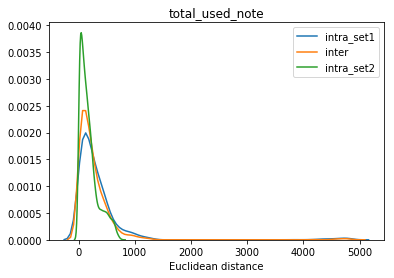

In [14]:
plot_jazz_train_set_intra = np.transpose(jazz_train_set_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_jazz_gen_set_intra = np.transpose(jazz_gen_set_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_jazz_train_set_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_jazz_gen_set_intra[i], label='intra_set2')

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

In [15]:
for i in range(0, len(metrics_list)):
    print(metrics_list[i] + ':')
    print('------------------------')
    print(' demo_set1')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_jazz_train_set_intra[i], plot_sets_inter[i]))
    print('  Overlap area:', utils.overlap_area(plot_jazz_train_set_intra[i], plot_sets_inter[i]))
    
    print(' demo_set2')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_jazz_gen_set_intra[i], plot_sets_inter[i]))
    print('  Overlap area:', utils.overlap_area(plot_jazz_gen_set_intra[i], plot_sets_inter[i]))

total_used_note:
------------------------
 demo_set1
('  Kullback\xe2\x80\x93Leibler divergence:', 0.04119846963216783)
('  Overlap area:', 0.8326324584664081)
 demo_set2
('  Kullback\xe2\x80\x93Leibler divergence:', 21.562848765066583)
('  Overlap area:', 0.7856712225541734)


In [16]:
jazz_train_set_eval = {'avg_pitch_shift': np.zeros((num_samples, 1))}
metrics_list = jazz_train_set_eval.keys()
for i in range(0, num_samples):
    feature = core2.extract_feature(jazz_train_set[i])
    jazz_train_set_eval[metrics_list[0]][i] = getattr(core2.metrics(), metrics_list[0])(feature, track_num=0)

In [17]:
jazz_gen_set_eval = {'avg_pitch_shift': np.zeros((num_samples, 1))}
metrics_list = jazz_gen_set_eval.keys()
for i in range(0, num_samples):
    feature = core2.extract_feature(jazz_gen_set[i])
    jazz_gen_set_eval[metrics_list[0]][i] = getattr(core2.metrics(), metrics_list[0])(feature, track_num=1)

In [18]:
for i in range(0, len(metrics_list)):
    print metrics_list[i] + ':'
    print '------------------------'
    print ' train_set'
    print '  mean: ', np.mean(jazz_train_set_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(jazz_train_set_eval[metrics_list[i]], axis=0)

    print '------------------------'
    print ' gen_set'
    print '  mean: ', np.mean(jazz_gen_set_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(jazz_gen_set_eval[metrics_list[i]], axis=0)

avg_pitch_shift:
------------------------
 train_set
  mean:  [2.71084169]
  std:  [0.35977167]
------------------------
 gen_set
  mean:  [2.38161994]
  std:  [0.35164707]


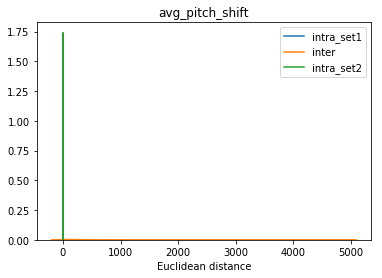

In [19]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
jazz_train_set_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
jazz_gen_set_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        jazz_train_set_intra[test_index[0]][i] = utils.c_dist(jazz_train_set_eval[metrics_list[i]][test_index], jazz_train_set_eval[metrics_list[i]][train_index])
        jazz_gen_set_intra[test_index[0]][i] = utils.c_dist(jazz_gen_set_eval[metrics_list[i]][test_index], jazz_gen_set_eval[metrics_list[i]][train_index])
plot_jazz_train_set_intra = np.transpose(jazz_train_set_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_jazz_gen_set_intra = np.transpose(jazz_gen_set_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_jazz_train_set_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_jazz_gen_set_intra[i], label='intra_set2')

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

In [20]:
for i in range(0, len(metrics_list)):
    print(metrics_list[i] + ':')
    print('------------------------')
    print(' demo_set1')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_jazz_train_set_intra[i], plot_sets_inter[i]))
    print('  Overlap area:', utils.overlap_area(plot_jazz_train_set_intra[i], plot_sets_inter[i]))
    
    print(' demo_set2')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_jazz_gen_set_intra[i], plot_sets_inter[i]))
    print('  Overlap area:', utils.overlap_area(plot_jazz_gen_set_intra[i], plot_sets_inter[i]))

avg_pitch_shift:
------------------------
 demo_set1
('  Kullback\xe2\x80\x93Leibler divergence:', 12.00238245976929)
('  Overlap area:', 0.0)
 demo_set2
('  Kullback\xe2\x80\x93Leibler divergence:', 9.91595599026202)
('  Overlap area:', 0.0)


In [22]:
jazz_train_set_eval = {'note_length_hist': np.zeros((num_samples, 12))}
metrics_list = jazz_train_set_eval.keys()
for i in range(0, num_samples):
    feature = core2.extract_feature(jazz_train_set[i])
    jazz_train_set_eval[metrics_list[0]][i] = getattr(core2.metrics(), metrics_list[0])(feature, track_num=0)

jazz_gen_set_eval = {'note_length_hist': np.zeros((num_samples, 12))}
metrics_list = jazz_gen_set_eval.keys()
for i in range(0, num_samples):
    feature = core2.extract_feature(jazz_gen_set[i])
    jazz_gen_set_eval[metrics_list[0]][i] = getattr(core2.metrics(), metrics_list[0])(feature, track_num=1)

In [23]:
for i in range(0, len(metrics_list)):
    print metrics_list[i] + ':'
    print '------------------------'
    print ' train_set'
    print '  mean: ', np.mean(jazz_train_set_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(jazz_train_set_eval[metrics_list[i]], axis=0)

    print '------------------------'
    print ' gen_set'
    print '  mean: ', np.mean(jazz_gen_set_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(jazz_gen_set_eval[metrics_list[i]], axis=0)

note_length_hist:
------------------------
 train_set
  mean:  [0.00406201 0.0145597  0.03163142 0.19795088 0.36989153 0.00504351
 0.01541734 0.03319024 0.15139014 0.01734862 0.05701969 0.10249491]
  std:  [0.01060965 0.02645457 0.03089087 0.12326916 0.26010936 0.01096646
 0.02177543 0.02271033 0.08991659 0.02308463 0.03655096 0.04564183]
------------------------
 gen_set
  mean:  [4.50886073e-04 6.18023318e-03 1.77309198e-02 6.23460401e-02
 6.13360101e-01 1.41916960e-03 7.31741848e-03 1.62390220e-02
 8.40359962e-02 7.83342826e-03 1.65488111e-02 1.66537974e-01]
  std:  [0.00208988 0.01701098 0.01930993 0.06627915 0.22724916 0.00369827
 0.01257682 0.01611372 0.07277219 0.01136021 0.0242305  0.12535497]


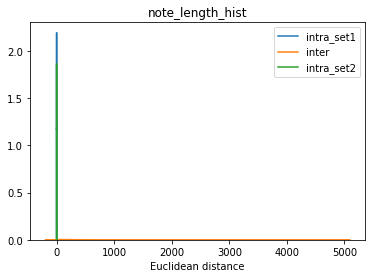

In [24]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
jazz_train_set_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
jazz_gen_set_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        jazz_train_set_intra[test_index[0]][i] = utils.c_dist(jazz_train_set_eval[metrics_list[i]][test_index], jazz_train_set_eval[metrics_list[i]][train_index])
        jazz_gen_set_intra[test_index[0]][i] = utils.c_dist(jazz_gen_set_eval[metrics_list[i]][test_index], jazz_gen_set_eval[metrics_list[i]][train_index])
plot_jazz_train_set_intra = np.transpose(jazz_train_set_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_jazz_gen_set_intra = np.transpose(jazz_gen_set_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_jazz_train_set_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_jazz_gen_set_intra[i], label='intra_set2')

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

In [25]:
for i in range(0, len(metrics_list)):
    print(metrics_list[i] + ':')
    print('------------------------')
    print(' demo_set1')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_jazz_train_set_intra[i], plot_sets_inter[i]))
    print('  Overlap area:', utils.overlap_area(plot_jazz_train_set_intra[i], plot_sets_inter[i]))
    
    print(' demo_set2')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_jazz_gen_set_intra[i], plot_sets_inter[i]))
    print('  Overlap area:', utils.overlap_area(plot_jazz_gen_set_intra[i], plot_sets_inter[i]))

note_length_hist:
------------------------
 demo_set1
('  Kullback\xe2\x80\x93Leibler divergence:', 46.100244659312644)
('  Overlap area:', 0.0)
 demo_set2
('  Kullback\xe2\x80\x93Leibler divergence:', 42.49872266461517)
('  Overlap area:', 0.0)


In [26]:
jazz_train_set_eval = {'note_length_transition_matrix': np.zeros((num_samples, (12,12))}
metrics_list = jazz_train_set_eval.keys()
for i in range(0, num_samples):
    feature = core2.extract_feature(jazz_train_set[i])
    jazz_train_set_eval[metrics_list[0]][i] = getattr(core2.metrics(), metrics_list[0])(feature, track_num=0)

jazz_gen_set_eval = {'note_length_trasition_matrix': np.zeros((num_samples, (12,12)))}
metrics_list = jazz_gen_set_eval.keys()
for i in range(0, num_samples):
    feature = core2.extract_feature(jazz_gen_set[i])
    jazz_gen_set_eval[metrics_list[0]][i] = getattr(core2.metrics(), metrics_list[0])(feature, track_num=1)

ValueError: could not broadcast input array from shape (12,12) into shape (12)

In [ ]:
for i in range(0, len(metrics_list)):
    print metrics_list[i] + ':'
    print '------------------------'
    print ' train_set'
    print '  mean: ', np.mean(jazz_train_set_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(jazz_train_set_eval[metrics_list[i]], axis=0)

    print '------------------------'
    print ' gen_set'
    print '  mean: ', np.mean(jazz_gen_set_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(jazz_gen_set_eval[metrics_list[i]], axis=0)